In [ ]:
# Topic Modelling

### Loading Data

In [21]:
import pandas as pd
import nltk

In [22]:
df = pd.read_csv("../data/news-setopati/news-setopati-processed.csv")
df

,topic,date,title,body
0,politics,"शुक्रबार, कात्तिक २४, २०८०",हर्क साम्पाङको चिठी पाएपछि हवाई नीतिविरूद्ध वि...,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,politics,"आइतबार, कात्तिक २६, २०८०",सरकारले भूकम्प प्रभावितलाई राहत पठाउन उपेक्षा ...,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पले भत्किएका संरचना बनाउन त्यहीँका बेरोजग...,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पपीडितलाई अस्थायी आवास बनाउन प्रतिपरिवार ...,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,politics,"आइतबार, कात्तिक २६, २०८०",हमासले बन्धक बनाएका आफन्तको सुरक्षा माग गर्दै ...,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...,...,...,...
14979,politics,"बिहीबार, माघ ६, २०७८","काभ्रेमा माघ महिनाभर सभा, भेला गर्न नपाइने",कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,politics,"बिहीबार, माघ ६, २०७८",काठमाडौं उपत्यकाका तीनै जिल्ला प्रशासन कार्याल...,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,politics,"बिहीबार, माघ ६, २०७८",कोरोनाको हटस्पट बनेपछि जागेको नरैनापुर,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,politics,"बिहीबार, माघ ६, २०७८",सत्तारूढ राजनीतिक समन्वय समितिको बैठक स्थगित,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


In [23]:
unprocessed_data = pd.DataFrame(columns=['body'])
unprocessed_data["body"] = df["body"].apply(str)
unprocessed_data

,body
0,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...
14979,कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


### Preprocessing

In [24]:
nepali_stopwords = open("../resources/stopwords.txt", "r")
stopwords = nepali_stopwords.read().split()
# print(stopwords)
print(len(stopwords))

501


In [25]:
'''
Remove unwanted characters
Remove stop words 
'''
import re
def string_manipulation(unprocessed_data)  : 
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', x))
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: " ".join([i.replace('\n', '').replace('\t', '').replace("\"",'') for i in x.split() if i not in (stopwords) and i != ' ']))
    return unprocessed_data

processed_data = string_manipulation(unprocessed_data)
processed_data

# processed_data = pd.DataFrame(columns=['body'])
# processed_data["body"] = df["body"]
# processed_data

,body
0,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,सरकारले कात्तिक भूकम्पबाट पूर्ण रूपमा भत्किएका...
4,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...
14979,कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत जिल्ल...
14980,उपत्यकाका काठमाडौं भक्तपुर ललितपुर जिल्ला प्रश...
14981,स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्थिरताका...
14982,आजका बोलाइएको सत्तारूढ राजनीतिक समन्वय समितिको...


In [26]:
from nepalitokenizer import NepaliTokenizer

In [106]:
tokenize.tokenizer('सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर')

['सामाजिक', 'सञ्जालमा', 'सक्रिय', 'रहने', 'धरानका', 'मेयर']

In [27]:
'''
tokenizing the corpus 
'''
tokenize = NepaliTokenizer()
processed_data["body"] = processed_data["body"].apply(tokenize.tokenizer)
processed_data

,body
0,"[सामाजिक, सञ्जालमा, सक्रिय, रहने, धरानका, मेयर..."
1,"[उपप्रधानमन्त्री, एवं, गृहमन्त्री, नारायणकाजी,..."
2,"[सरकारले, भूकम्प, प्रभावित, क्षेत्रको, पुनर्नि..."
3,"[सरकारले, कात्तिक, भूकम्पबाट, पूर्ण, रूपमा, भत..."
4,"[प्यालेस्टाइनको, इस्लामिस्ट, समूह, हमासको, बन्..."
...,...
14979,"[कोभिड, सङ्क्रमणको, बढ्दो, जोखिमलाई, दृष्टिगत,..."
14980,"[उपत्यकाका, काठमाडौं, भक्तपुर, ललितपुर, जिल्ला..."
14981,"[स्थानीय, सरकारसम्पादकीय, नोट, राजनीतिक, अस्थि..."
14982,"[आजका, बोलाइएको, सत्तारूढ, राजनीतिक, समन्वय, स..."


In [28]:
import snowballstemmer

In [29]:
'''
Stemming & StopWord removal after Stemming
'''
stemmer = snowballstemmer.NepaliStemmer()

def get_stem(words):
    global stemmer
    new_list = stemmer.stemWords(words)
    return new_list

def clean_data(words):
    new_list = []
    for word in words:
        if len(word)>2 and word not in stopwords:
            new_list.append(word)

    return new_list
        
# ans = get_stem(["फिल्मी", "अनुराग", "वर्ष", "अघिसम्म", "उनका", "बलिउड"])
# ans

In [30]:
processed_data['body'] = processed_data['body'].apply(lambda x : get_stem(x))

In [31]:
processed_data['body'] = processed_data['body'].apply(lambda x : clean_data(x))

In [32]:
processed_data_list = processed_data['body']

In [53]:
processed_data_list

0        [सामाजिक, सञ्जाल, सक्रिय, धरान, मेयर, हर्क, सा...
1        [उपप्रधानमन्त्री, एवं, गृहमन्त्री, नारायणकाजी,...
2        [सरकार, भूकम्प, प्रभावित, क्षेत्र, पुनर्निर्मा...
3        [सरकार, कात्तिक, भूकम्पबाट, पूर्ण, भत्क, अस्था...
4        [प्यालेस्टाइन, इस्लामिस्ट, समूह, हमास, बन्धक, ...
                               ...                        
14979    [कोभिड, सङ्क्रमण, बढ्, जोखिम, दृष्टिगत, जिल्ला...
14980    [उपत्यका, काठमाडौं, भक्तपुर, ललितपुर, जिल्ला, ...
14981    [स्थानीय, सरकारसम्पादकीय, नोट, राजनीतिक, अस्थि...
14982    [बोला, सत्तारूढ, राजनीतिक, समन्वय, समिति, बैठक...
14983    [त्रिभुवन, विश्वविद्यालय, कुलपतिसमेत, प्रधानमन...
Name: body, Length: 14984, dtype: object

### Visualization and Analysis of Data

In [14]:
'''
Finding the frequency Distribution of Words
'''
# words_list = []
# for sentence in processed_data_list:
#     words_list.extend(sentence)
# freq_dist = nltk.FreqDist(words_list)
# freq_dist.most_common(20)

'\nFinding the frequency Distribution of Words\n'

In [15]:
'''
Visualization of Most Frequency 
'''
# %config InlineBackend.figure_format = 'retina'
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import seaborn as sns
# sns.set()
# nepali_font = FontProperties(fname = 'Mangal.ttf')
# temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.barplot(x='word', y='count', 
#             data=temp, ax=ax)
# plt.title("Top words")
# plt.xticks(rotation='vertical',fontproperties=nepali_font);

'\nVisualization of Most Frequency \n'

In [16]:
'''
Forming Word Cloud
'''
# %config InlineBackend.figure_format = 'retina'

# from wordcloud import WordCloud
# import wordcloud
# # creation of wordcloud
# wcloud_fig = WordCloud(colormap='viridis', width=300, height=200, font_path="./Mangal.ttf").generate_from_frequencies(freq_dist)

# # plotting the wordcloud
# plt.figure(figsize=(10,7), frameon=True )

# plt.imshow(wcloud_fig, interpolation  = 'bilinear')
# plt.show()

'\nForming Word Cloud\n'

### Preparation for LDA

In [45]:
from gensim import corpora

In [46]:
from gensim.test.utils import datapath

In [47]:
'''
Representing the Corpus in dictionary: 
{unique_id : word}
'''
id2word = corpora.Dictionary(processed_data_list)
print(id2word)

Dictionary<118574 unique tokens: ['अंश', 'अधिकारी', 'अधिकृत', 'अध्ययन', 'अनिल']...>


In [49]:
'''
Checking dictionary created
'''
# count = 0
# for k, v in id2word.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

'\nChecking dictionary created\n'

In [50]:
'''
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
# id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=None)

In [51]:
print(id2word)

Dictionary<9649 unique tokens: ['अंश', 'अधिकारी', 'अधिकृत', 'अध्ययन', 'अनिल']...>


In [60]:
# save dictionary
# id2word.save('../saved_model/dictionary_1.txt')

In [52]:
'''
bag-of-words format = list of (token_id, token_count) 2-tuples
'''
#  now lets create a encoded bag of words 
bow_corpus = [id2word.doc2bow(sent) for sent in processed_data_list]
# bow_corpus[0] 

In [69]:
# save bow corpus
# with open('../saved_model/bow_corpus_1.txt', 'w') as f:
#     for line in bow_corpus:
#         f.write(f"{line}\n")

In [39]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 4310 which we have checked in Step 2
# document_num = 4310
# bow_doc_4310 = bow_corpus[document_num]
# count = 0

# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                      id2word[bow_doc_4310[i][0]], 
#                                                      bow_doc_4310[i][1]))
#     count += 1
#     if count > 10:
#         break

'\nPreview BOW for our sample preprocessed document\n'

### LDA - (BOW)

In [40]:
# Creating the object for LDA model using gensim library
import gensim
from gensim.models import CoherenceModel

In [41]:
'''
Loading the Saved Model
'''
# loading model from disk
from gensim import  models

# temp_file = datapath("lda_model_politics_31")
lda_model = models.ldamodel.LdaModel.load('../saved_model/lda_model_politics_1')

In [42]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# LDA = gensim.models.ldamulticore.LdaMulticore
# # [deprecated] lda_model = LDA(corpus=corpus_matrix,id2word=id2word, num_topics=10, random_state=100,update_every=1,chunksize=100,passes=5,alpha='auto',per_word_topics=True)

# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=30, id2word=id2word, passes=50, workers=5)

"\nTrain your lda model using gensim.models.LdaMulticore and save it to 'lda_model'\n"

In [43]:
'''
For Saving  Model
'''
#saving model to disk.
# [ deprecated ] temp_file = datapath("../../../../../../../saved_model/lda_model_politics_3")
# lda_model.save('../saved_model/lda_model_politics_1')

'\nFor Saving  Model\n'

In [44]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic id : {}".format(idx))
    print("Words: {} \n".format(topic))
    print("\n")

Topic id : 0
Words: 0.085*"प्रहरी" + 0.012*"घटना" + 0.010*"सजाय" + 0.010*"मुद्" + 0.009*"पीडित" + 0.008*"सशस्त्र" + 0.008*"महानिरीक्षक" + 0.008*"बलात्कार" + 0.008*"आरोप" + 0.008*"पक्राउ" 



Topic id : 1
Words: 0.036*"छानबिन" + 0.028*"कारबाही" + 0.017*"पीडित" + 0.017*"न्याय" + 0.017*"घटना" + 0.017*"सुन" + 0.014*"अधिकार" + 0.014*"उजुरी" + 0.013*"विज्ञप्ति" + 0.013*"कानुन" 



Topic id : 2
Words: 0.045*"सिट" + 0.041*"यादव" + 0.023*"जसपा" + 0.021*"जित" + 0.018*"जनमत" + 0.016*"मधेस" + 0.015*"प्रतिशत" + 0.014*"मोर्चा" + 0.014*"समानुपातिक" + 0.012*"साह" 



Topic id : 3
Words: 0.033*"अनुसन्धान" + 0.021*"खाण" + 0.021*"प्रकरण" + 0.021*"पक्राउ" + 0.016*"शरणार्" + 0.016*"गृहमन्त्री" + 0.016*"प्रहरी" + 0.014*"रकम" + 0.013*"भुटानी" + 0.012*"करोड" 



Topic id : 4
Words: 0.013*"खर्च" + 0.013*"योजना" + 0.011*"उद्योग" + 0.010*"कार्यान्वयन" + 0.009*"अर्थतन्त्र" + 0.009*"बजेट" + 0.009*"प्रतिशत" + 0.008*"कर्णाली" + 0.008*"उत्पादन" + 0.007*"लगानी" 



Topic id : 5
Words: 0.010*"मान्" + 0.009*"राजनीति" + 

In [29]:
'''
This groups the documents by their topic, for e.g
{
    0 : [list of documents in topic index 0]
}
'''

cluster_by_topic = {}
[cluster_by_topic.setdefault(i, []) for i in range(lda_model.num_topics)]
index = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0.8)
    for topic_id, score in topics_list: 
        cluster_by_topic[topic_id].append(index)
    index += 1

In [61]:
print(lda_model.num_topics)

30


In [71]:
'''
# Printing the documents that belong to a certain topic 
# '''
for k,v in cluster_by_topic.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")


Topic : 0.085*"प्रहरी" + 0.012*"घटना" + 0.010*"सजाय" + 0.010*"मुद्" + 0.009*"पीडित" + 0.008*"सशस्त्र" + 0.008*"महानिरीक्षक" + 0.008*"बलात्कार" + 0.008*"आरोप" + 0.008*"पक्राउ"
---------------------------------------------------
---------------------------------------------------
Topic : 0.036*"छानबिन" + 0.028*"कारबाही" + 0.017*"पीडित" + 0.017*"न्याय" + 0.017*"घटना" + 0.017*"सुन" + 0.014*"अधिकार" + 0.014*"उजुरी" + 0.013*"विज्ञप्ति" + 0.013*"कानुन"
---------------------------------------------------
---------------------------------------------------
Topic : 0.045*"सिट" + 0.041*"यादव" + 0.023*"जसपा" + 0.021*"जित" + 0.018*"जनमत" + 0.016*"मधेस" + 0.015*"प्रतिशत" + 0.014*"मोर्चा" + 0.014*"समानुपातिक" + 0.012*"साह"
---------------------------------------------------
---------------------------------------------------
Topic : 0.033*"अनुसन्धान" + 0.021*"खाण" + 0.021*"प्रकरण" + 0.021*"पक्राउ" + 0.016*"शरणार्" + 0.016*"गृहमन्त्री" + 0.016*"प्रहरी" + 0.014*"रकम" + 0.013*"भुटानी" + 0.012*"करोड"
---

In [72]:
'''
Getting the top 5 documents in each topics
'''
my_ids = [i for i in range(len(bow_corpus))]

top_documents = {}
[top_documents.setdefault(i, []) for i in range(lda_model.num_topics)]

for topic_id in range(lda_model.num_topics):
    tops = sorted(zip(my_ids, lda_model[bow_corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(topic_id, 0.0)))
    top_five =  tops[ : 5]
    for index, _ in top_five:
        top_documents[topic_id].append(index)

KeyboardInterrupt: 

In [32]:
'''
Printing the top 5 documents in each topics
'''
for k,v in top_documents.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")

Topic : 0.085*"प्रहरी" + 0.012*"घटना" + 0.010*"सजाय" + 0.010*"मुद्" + 0.009*"पीडित" + 0.008*"सशस्त्र" + 0.008*"महानिरीक्षक" + 0.008*"बलात्कार" + 0.008*"आरोप" + 0.008*"पक्राउ"
---------------------------------------------------
छानबिन समितिले भन्यो- जेल प्रशासनले फोटो नराख्दा सुन्दर हरिजनले अर्कैको सजाय काट्नु पर्‍यो
आइजिपी नियुक्तिविरूद्ध दुई एआइजी अदालत जाँदै
सशस्त्र प्रहरी अतिरिक्त महानिरीक्षकमा राजु अर्याल सिफारिस
सशस्त्र प्रहरीको एआइजीमा बंशीराज दाहाललाई बढुवा गर्न सिफारिस
बालिका बलात्कारको मुद्दा हेरिरहेकी सरकारी वकिलको सरूवा, भन्छिन्- मुद्दा कमजोर बनाउन नमान्दा हटाइयो
---------------------------------------------------
Topic : 0.036*"छानबिन" + 0.028*"कारबाही" + 0.017*"पीडित" + 0.017*"न्याय" + 0.017*"घटना" + 0.017*"सुन" + 0.014*"अधिकार" + 0.014*"उजुरी" + 0.013*"विज्ञप्ति" + 0.013*"कानुन"
---------------------------------------------------
कानून आयोगको प्रतिवेदनपछि बलात्कार मुद्दामा हदम्यादबारे कानूनमा आवश्यक व्यवस्था हुन्छ: मन्त्री कोइराला
द्वन्द्वकालमा मानव अधिकार उल्लंघनका घटनाल

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5      0.025328  0.145350       1        1  6.697933
6      0.120052  0.105842       2        1  6.387650
24     0.133638  0.154274       3        1  5.269853
16    -0.159547  0.040860       4        1  4.858031
10    -0.214671  0.073349       5        1  4.840325
4      0.226591  0.033587       6        1  4.100378
25     0.144699  0.073007       7        1  4.087245
14     0.074474  0.075828       8        1  4.062715
8      0.132998 -0.017431       9        1  3.910891
22    -0.208245  0.015454      10        1  3.695641
17    -0.011568 -0.204409      11        1  3.695498
7      0.185850  0.063257      12        1  3.620144
9     -0.151978  0.061639      13        1  3.366686
26    -0.241733  0.080730      14        1  3.061921
3     -0.007404 -0.194514      15        1  3.060883
0     -0.005994 -0.155214      16        1  3.024309
20    -0.061406 -0.108438      17        1  2.952762
12     0.009028 -0.120866      18        1  2.923651
2     -0.139159  0.192480      19        1  2.833664
15     0.003695  0.096759      20        1  2.787158
27     0.002006 -0.149815      21        1  2.672782
29    -0.006352  0.053376      22        1  2.665658
28    -0.058925 -0.135160      23        1  2.472005
1      0.084766 -0.166820      24        1  2.442259
11     0.102771 -0.030072      25        1  2.226733
13     0.095981  0.002458      26        1  2.020855
18    -0.115159 -0.035189      27        1  1.864766
19    -0.005056 -0.000213      28        1  1.800320
21     0.102556  0.054441      29        1  1.371171
23    -0.057236 -0.004547      30        1  1.226113, topic_info=              Term         Freq        Total Category  logprob  loglift
1559        प्रहरी  4848.000000  4848.000000  Default  30.0000  30.0000
431         विधेयक  4532.000000  4532.000000  Default  29.0000  29.0000
1292      नागरिकता  3808.000000  3808.000000  Default  28.0000  28.0000
365          अदालत  4628.000000  4628.000000  Default  27.0000  27.0000
522   मुख्यमन्त्री  3965.000000  3965.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2784        सभामुख   125.154320  2998.782639  Topic30  -5.0036   1.2249
1450     पार्टीबाट    81.718825   643.160521  Topic30  -5.4298   2.3382
1422     विज्ञप्ति    91.419993  1321.415224  Topic30  -5.3176   1.7303
795      प्रक्रिया    98.996134  2630.229267  Topic30  -5.2380   1.1216
3870          ठेक्    73.212127   526.142920  Topic30  -5.5397   2.4291

[2037 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5274      2  0.869541   अँध्यारो
5274     13  0.057969   अँध्यारो
9346     18  0.981699    अंगिकृत
2923     18  0.996025    अंगीकृत
1903      3  0.003923       अखिल
...     ...       ...        ...
7389      5  0.958073  होकर्णाली
9049      2  0.948260    होतपाईं
5414     13  0.100191    होसत्ता
5414     19  0.851621    होसत्ता
5497     13  0.944395   होसभापति

[10527 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 25, 17, 11, 5, 26, 15, 9, 23, 18, 8, 10, 27, 4, 1, 21, 13, 3, 16, 28, 30, 29, 2, 12, 14, 19, 20, 22, 24])

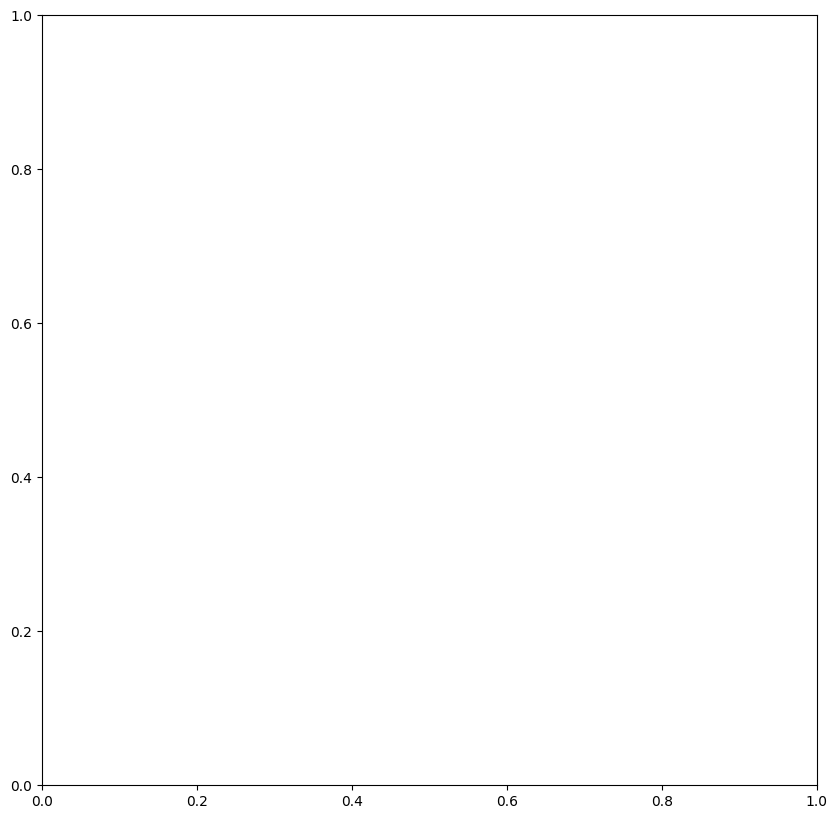

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = bow_corpus, dictionary = id2word)
vis

### LDA - (TF-IDF)

In [35]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
# from gensim import corpora, models

# tfidf = models.TfidfModel(bow_corpus)

"\nCreate tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'\n"

In [36]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
# corpus_tfidf = tfidf[bow_corpus]

"\nApply transformation to the entire corpus and call it 'corpus_tfidf'\n"

In [37]:
'''
Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)
'''
# count = 0
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)
#     count +=1
#     if count > 10 :
#         break

'\nPreview TF-IDF scores for our first document --> --> (token_id, tfidf score)\n'

In [38]:
# import operator

In [39]:
'''
This took more than 20 minutes so i had to stop
It attempts to keep training lda model until the thresold is reached
'''
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    # top_topics = [(0, 0)]
    # while top_topics[0][1] < 0.97:

    #     lm = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=id2word, passes=2, workers=2)
    #     coherence_values = {}
    #     for n, topic in lm.show_topics(num_topics=-1, formatted=False):
    #         topic = [word for word, _ in topic]
    #         cm = CoherenceModel(topics=[topic], texts=processed_data_list, dictionary=id2word, window_size=10)
    #         coherence_values[n] = cm.get_coherence()
    #     top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    #     print(top_topics[0][1])
    # return lm, top_topics

In [40]:
# lm, top_topics = ret_top_model()

### HDP

In [41]:
# from gensim.models import HdpModel

In [42]:
# hdp_model = gensim.models.HdpModel(bow_corpus, id2word=id2word)

In [43]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
# for idx, topic in hdp_model.print_topics(-1):
#     print("Topic: {} \nWords: {}".format(topic, idx ))
#     print("\n")

'\nFor each topic, we will explore the words occuring in that topic and its relative weight\n'

In [44]:
# document_dict = {
#     0 : "Manoranjan",
#     1000 : "Sahitya",
#     2000 : "Suchana Prabhidhi",
#     3000 : "Bichar",
#     4350 : "Swasthya",
#     5000 : "Prabas",
#     6000 : "Khelkud",
#     7000 : "Viswa",
#     8000 : "Desh",
#     9000 : "Artha",
# }
# document_num = 9200 
# print()
# # Our test document is document number 4310
# for k,v in document_dict.items():
#     print("\n{}\n".format(v))
#     for index, score in sorted(hdp_model[bow_corpus[k]], key=lambda tup: -1*tup[1]):
#         print("\nScore: {}\t \nTopic: {}".format(score, hdp_model.print_topic(index, 5)))

In [45]:
# '''
# Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
# '''

# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
#                                        num_topics=25, 
#                                        id2word = id2word, 
#                                        passes = 2, 
#                                        workers=2)

In [46]:
# '''
# For each topic, we will explore the words occuring in that topic and its relative weight
# '''
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print("Topic: {} Word: {}".format(idx, topic))
#     print("\n")

In [47]:
# '''
# Check which topic our test document belongs to using the LDA TF-IDF model.
# '''
# # Our test document is document number 4310
# for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [48]:
# lda_model.print_topics()

### Unseen Document Topic Identification 

In [141]:
df1 = pd.DataFrame(columns=['body'])
df1

,body


In [142]:
'''
Unseen Document
'''

# Rajniti
df1.loc[0] = ['''
सन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका नेता इस्माइल हानियाले गाजाका विभिन्न सशस्त्र गुटहरूबीच "बलियो सन्देश र एकताको सङ्केत" को रूपमा 'स्ट्रङ पिलर' छद्म नाम दिइएको चारमध्ये पहिलो सैन्य अभ्यास गर्ने घोषणा गरे।

हमास गाजाको सबैभन्दा शक्तिशाली सशस्त्र समूह थियो। अन्य १० प्यालेस्टिनी समूह पनि सम्मिलित गठबन्धन हमास प्रमुख घटक थियो। ती लडाकु समूहहरू युद्धको खेलजस्तो अभ्यासमा सहभागी भए। त्यसलाई "संयुक्त अपरेशन कक्ष"ले निगरानी गरेको थियो।

गाजाका सशस्त्र गुटहरूसँग एउटा केन्द्रीय कमान्डअन्तर्गत समन्वय गर्न सन् २०१८ मा उक्त संरचना बनाइएको थियो।

सन् २०१८ अघि हमासले प्यालेस्टिनी इस्लामिक जिहाद (पीआईजे) सँग समन्वय गरेको थियो। पीआईजे गाजाको दोस्रो ठूलो सशस्त्र गुट हो। ब्रिटेन र अन्य देशमा उक्त सङ्गठनलाई हमासलाई जसरी नै प्रतिबन्धित आतङ्कवादी सङ्गठनका रूपमा हेरिन्छ। 

पहिलाका द्वन्द्वमा पनि हमासले अरू समूहहरूसँग मिलेर लडाइँ गरेको थियो।

तर २०२० को अभ्यासलाई धेरै समूह एकजुट भएको प्रमाणको रूपमा प्रचारबाजी गरियो।

हमास नेताले पहिलो अभ्यासले सशस्त्र समूहहरूको "स्थायी तत्परता" प्रतिबिम्बित गरेको बताएका थिए।

तीन वर्षमा गरिएका चारवटा संयुक्त अभ्यासमध्ये सन् २०२० को अभ्यास पहिलो थियो। विभिन्न सामाजिक सञ्जालहरूमा ती सबैसँग सम्बन्धित भिडिओहरू छन्।

सन्देश आदानप्रदान गर्ने एप टेलिग्राममा प्रेषित फुटेजका अनुसार ‘स्ट्रङ पिलर’ अभ्यासमा सहभागी भएका पीआईजेसहित १० वटा लडाकु समूहलाई टाउकोमा बाँध्ने पट्टी र चिह्नका आधारमा बीबीसीले स्पष्टसँग पहिचान गरेको छ।  
''' ]

df1

,body
0,\nसन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका...


In [143]:
'''
Preparing the Bag of Words
'''
df1['body'] = df1['body'].apply(str)
processed_new_data = string_manipulation(df1)
df1

,body
0,डिसेम्बर हमासका समूहका नेता इस्माइल हानियाले ग...


In [150]:
processed_new_data['body'].to_list()[0]

"डिसेम्बर हमासका समूहका नेता इस्माइल हानियाले गाजाका सशस्त्र गुटहरूबीच बलियो सन्देश एकताको सङ्केत रूपमा 'स्ट्रङ पिलर' छद्म नाम दिइएको चारमध्ये सैन्य अभ्यास घोषणा हमास गाजाको सबैभन्दा शक्तिशाली सशस्त्र समूह प्यालेस्टिनी समूह सम्मिलित गठबन्धन हमास प्रमुख घटक लडाकु समूहहरू युद्धको खेलजस्तो अभ्यासमा सहभागी त्यसलाई संयुक्त अपरेशन कक्षले निगरानी गाजाका सशस्त्र गुटहरूसँग केन्द्रीय कमान्डअन्तर्गत समन्वय संरचना बनाइएको हमासले प्यालेस्टिनी इस्लामिक जिहाद पीआईजे समन्वय पीआईजे गाजाको सशस्त्र गुट ब्रिटेन देशमा सङ्गठनलाई हमासलाई प्रतिबन्धित आतङ्कवादी सङ्गठनका रूपमा हेरिन्छ पहिलाका द्वन्द्वमा हमासले समूहहरूसँग मिलेर लडाइँ अभ्यासलाई समूह एकजुट प्रमाणको रूपमा प्रचारबाजी गरियो हमास नेताले अभ्यासले सशस्त्र समूहहरूको स्थायी तत्परता प्रतिबिम्बित बताएका वर्षमा गरिएका चारवटा संयुक्त अभ्यासमध्ये अभ्यास सामाजिक सञ्जालहरूमा सबैसँग सम्बन्धित भिडिओहरू सन्देश आदानप्रदान एप टेलिग्राममा प्रेषित फुटेजका स्ट्रङ पिलर अभ्यासमा सहभागी पीआईजेसहित लडाकु समूहलाई टाउकोमा बाँध्ने पट्टी चिह्नका आधारमा बीबीसीले स्पष्टसँग पहिचान

In [109]:
processed_new_data["body"] = processed_new_data["body"].apply(tokenize.tokenizer)

In [110]:
processed_new_data

,body
0,"[डिसेम्बर, हमास, समूह, नेता, इस्माइल, हानिया, ..."


In [111]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : get_stem(x))
# processed_new_data.news.to_list()

TypeError: ord() expected a character, but string of length 6 found

In [78]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : clean_data(x))
for l in processed_new_data.body.to_list():
    print(len(l))

117


In [80]:
'''
Finds the topic and corresponding score for the unseen document 
'''
# Data preprocessing step for the unseen document
list_of_string = processed_new_data.body.to_list()[0] 
bow_vector = id2word.doc2bow(list_of_string)
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

[(200, 1), (213, 1), (340, 8), (341, 1), (427, 1), (444, 7), (450, 1), (467, 1), (586, 1), (717, 1), (761, 1), (790, 1), (869, 2), (928, 1), (1041, 1), (1227, 1), (1241, 1), (1260, 1), (1361, 4), (1458, 2), (1591, 1), (1608, 1), (1612, 2), (1827, 1), (2220, 1), (2557, 2), (2649, 5), (3069, 1), (3156, 1), (3362, 1), (3714, 1), (3949, 6), (3967, 1), (4130, 2), (4209, 1), (4801, 1), (5241, 1), (5631, 2), (7948, 1), (8272, 1), (8716, 1), (9493, 1)]
Score: 0.554354190826416	 Topic: 0.026*"भ्रमण" + 0.026*"युक्रेन" + 0.022*"चीन" + 0.016*"रूस" + 0.016*"अमेरि"
Score: 0.19518309831619263	 Topic: 0.013*"अवसर" + 0.011*"दिवस" + 0.011*"व्यक्त" + 0.011*"एकता" + 0.008*"एवं"
Score: 0.136964350938797	 Topic: 0.085*"प्रहरी" + 0.012*"घटना" + 0.010*"सजाय" + 0.010*"मुद्" + 0.009*"पीडित"
Score: 0.05433602258563042	 Topic: 0.016*"निर्देशन" + 0.016*"कार्य" + 0.011*"सूचना" + 0.011*"सञ्चालन" + 0.011*"मतदाता"
Score: 0.031082594767212868	 Topic: 0.034*"कोइराला" + 0.031*"थापा" + 0.024*"महामन्त्री" + 0.019*"महाधिवेश

In [81]:
lda_model[bow_vector]

[(0, 0.13697362),
 (8, 0.054024693),
 (9, 0.0309475),
 (14, 0.554633),
 (24, 0.19533429),
 (27, 0.017268203)]

In [92]:
x = dict(lda_model.show_topic(0,20))
print(x)

{'प्रहरी': 0.08478714, 'घटना': 0.012475042, 'सजाय': 0.010353013, 'मुद्': 0.010194776, 'पीडित': 0.009026977, 'सशस्त्र': 0.008337416, 'महानिरीक्षक': 0.008083612, 'बलात्कार': 0.008064296, 'आरोप': 0.008030288, 'पक्राउ': 0.007946367, 'सिंह': 0.0077871755, 'बढुवा': 0.006923465, 'प्रदर्शन': 0.0067235413, 'नियन्त्रण': 0.0066473726, 'सुरक्षा': 0.006437183, 'जाहेरी': 0.006350444, 'कैद': 0.0059194383, 'कारागार': 0.0054648067, 'गाडी': 0.0052650026, 'हत्या': 0.0051813484}


In [97]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

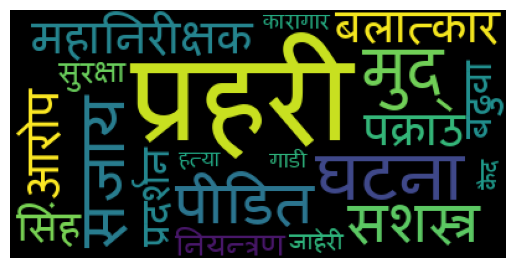

In [105]:
plt.axis('off')
plt.imshow(WordCloud(font_path="../resources/Mangal.ttf").fit_words(x))
plt.savefig('image.png', bbox_inches='tight')

In [83]:
lda_model.print_topic(0)

'0.085*"प्रहरी" + 0.012*"घटना" + 0.010*"सजाय" + 0.010*"मुद्" + 0.009*"पीडित" + 0.008*"सशस्त्र" + 0.008*"महानिरीक्षक" + 0.008*"बलात्कार" + 0.008*"आरोप" + 0.008*"पक्राउ"'

### Document Similarity - JensenShanon Distance

In [56]:
import numpy as np

In [57]:
'''
Obtaining the topic distribution of every document
'''
doc_topic_dist = []
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0)
    # print(topics_list)
    row = []
    for idx, score in topics_list:
        row.append(score)

    doc_topic_dist.append(row)

print(len(doc_topic_dist))

14984


In [58]:
doc_distribution = np.array(doc_topic_dist)
doc_distribution.shape

(14984, 30)

In [59]:
new_dist = []
for idx,score in lda_model.get_document_topics(bow_vector, minimum_probability=0):
    new_dist.append(score)

new_doc_distribution = np.array(new_dist)
new_doc_distribution.shape
# new_doc_distribution = np.array([tup[1] for tup in lda_model[bow_vector]])
# new_doc_distribution.shape

(30,)

In [60]:
from scipy.stats import entropy
from scipy.spatial import distance

In [61]:
# def jensen_shannon(query, matrix):
#     """
#     This function implements a Jensen-Shannon similarity
#     between the input query (an LDA topic distribution for a document)
#     and the entire corpus of topic distributions.
#     It returns an array of length M where M is the number of documents in the corpus
#     """
#     # lets keep with the p,q notation above
#     p = query[None,:].T # take transpose
#     q = matrix.T # transpose matrix
#     m = 0.5*(p + q)
#     return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    """
    sim = [distance.jensenshannon(data,query) for data in matrix]
    return np.array(sim)

In [62]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [63]:
most_sim_ids = get_most_similar_documents(new_doc_distribution, doc_distribution)
# print(most_sim_ids)
for ids in most_sim_ids:
    print(df['title'][ids])

तेस्रो पटक किभ पुगेर बेलायती प्रधानमन्त्रीले थप सहयोग घोषणा गर्दै भने- युक्रेनले यो युद्ध अवश्य जित्नेछ
भारत र क्यानडाले निकाले एक-अर्काका कूटनीतिज्ञ
परराष्ट्रमन्त्री र चिनियाँ कम्युनिष्ट पार्टीका विदेश विभाग प्रमुखबीच भेटवार्ता
अफ्रिकी मुलुक नाइजरमा सैन्य कू, राष्ट्रपति नियन्त्रणमा
जलवायु परिवर्तन शिखर सम्मेलन इजिप्टमा सुरू हुँदै, अधिकारकर्मीबाट प्रदर्शनको तयारी
परराष्ट्रमन्त्री साउद र अमेरिकी पूर्वविदेशमन्त्रीबीच भेटवार्ता
आइपुगे चीनका नयाँ राजदूत सोङ
नेपाल-चीन सम्बन्धमा नयाँ ऊर्जा थपिएको छः चिनियाँ प्रधानमन्त्री
परराष्ट्रमन्त्री साउद बङ्गलादेश प्रस्थान
रुसमा युद्धको विरोध गर्दै प्रदर्शनमा उत्रिएका ११ सय बढी पक्राउ
